In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv("titles.csv")
titles_df=pd.DataFrame(d)

In [3]:
titles_df

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008
...,...,...
244909,Black Butterfly in a Colorful World,2018
244910,Hua fei hua wu chun man cheng,1980
244911,Nippon dabi katsukyu,1970
244912,Under Siege 2: Dark Territory,1995


In [4]:
d=pd.read_csv("cast.csv")
cast_df=pd.DataFrame(d)

In [5]:
cast_df

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# 1.Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
superman_batman_roles = cast_df[(cast_df['character'] == "Superman") | (cast_df['character'] == "Batman")]

character_counts_by_year = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)

superman_years = character_counts_by_year[character_counts_by_year['Superman'] > character_counts_by_year['Batman']]

num_superman_years = len(superman_years)

print("Number of Superman years in film history:", num_superman_years)

Number of Superman years in film history: 11


# 2.How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
superman_batman_roles = cast_df[(cast_df['character'] == "Superman") | (cast_df['character'] == "Batman")]

character_counts_by_year = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)

batman_years = character_counts_by_year[character_counts_by_year['Batman'] > character_counts_by_year['Superman']]

num_batman_years = len(batman_years)

print("Number of Batman years in film history:", num_batman_years)

Number of Batman years in film history: 27


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film.

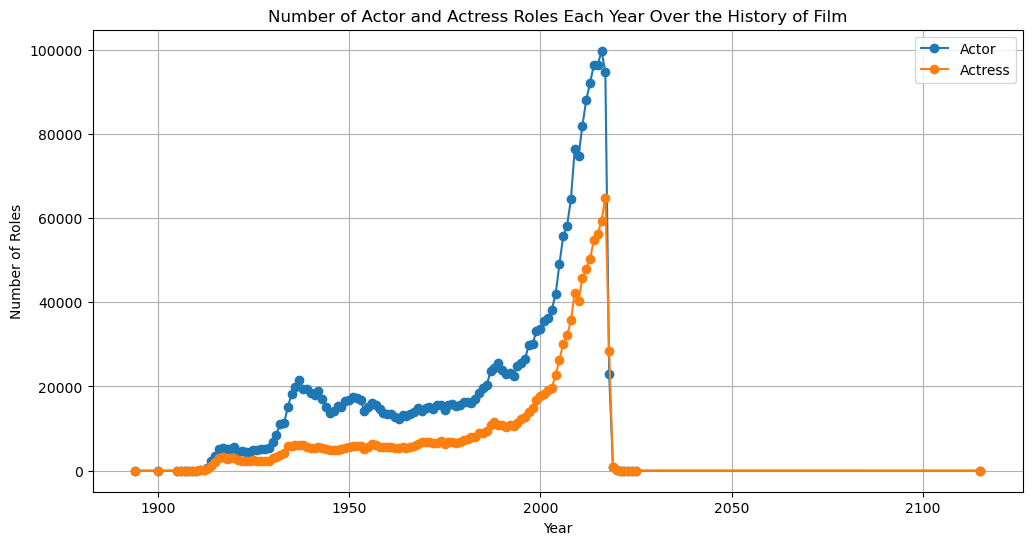

In [8]:
actor_actress_roles = cast_df[(cast_df['type'] == "actor") | (cast_df['type'] == "actress")]

roles_by_year_and_type = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
roles_by_year_and_type.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())
plt.title('Number of Actor and Actress Roles Each Year Over the History of Film')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(['Actor', 'Actress'])
plt.grid(True)
plt.show()

# 4.Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.


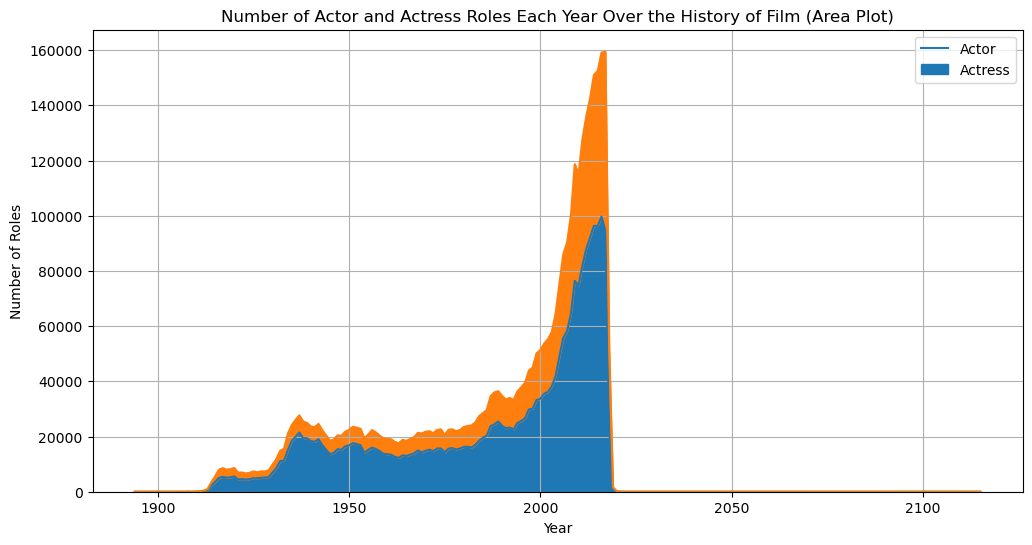

In [9]:
actor_actress_roles = cast_df[(cast_df['type'] == "actor") | (cast_df['type'] == "actress")]

roles_by_year_and_type = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
roles_by_year_and_type.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Number of Actor and Actress Roles Each Year Over the History of Film (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(['Actor', 'Actress'])
plt.grid(True)
plt.show()

# 5.Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

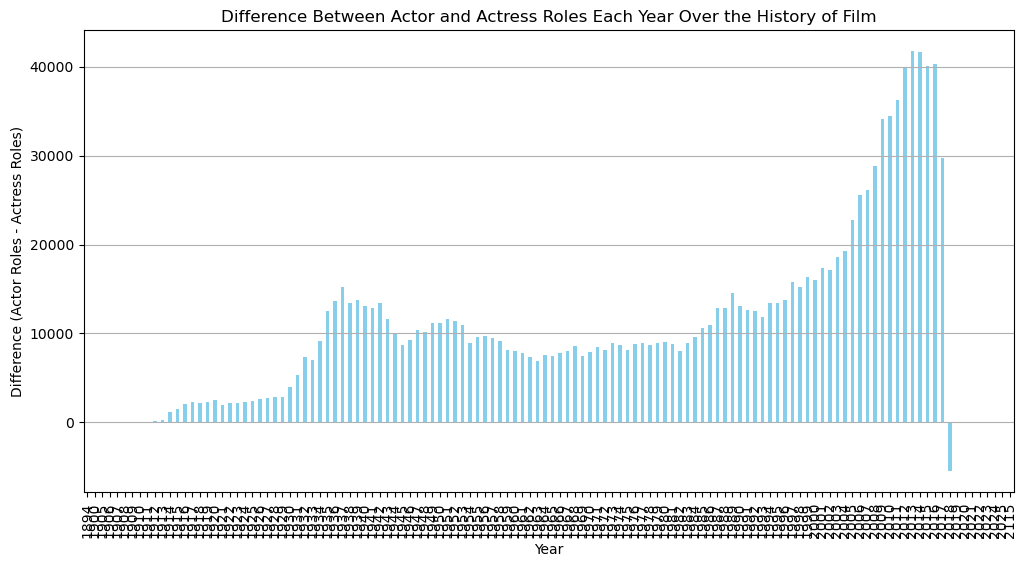

In [10]:
actor_actress_roles = cast_df[(cast_df['type'] == "actor") | (cast_df['type'] == "actress")]

roles_by_year_and_type = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

roles_difference = roles_by_year_and_type['actor'] - roles_by_year_and_type['actress']

plt.figure(figsize=(12, 6))
roles_difference.plot(kind='bar', color='skyblue')
plt.title('Difference Between Actor and Actress Roles Each Year Over the History of Film')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.grid(axis='y')
plt.show()

# 6.Plot the fraction of roles that have been 'actor' roles each year in the history of film.

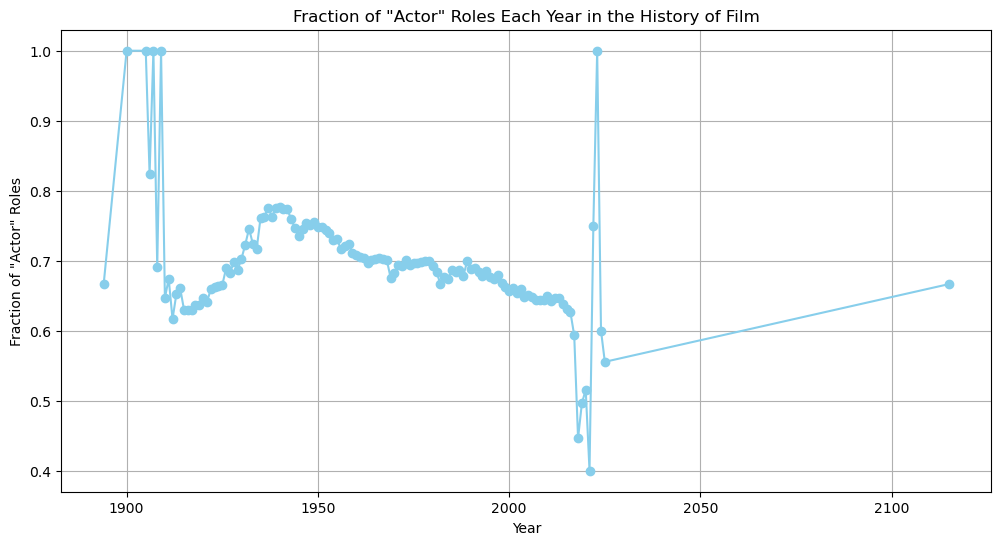

In [11]:
actor_actress_roles = cast_df[(cast_df['type'] == "actor") | (cast_df['type'] == "actress")]

roles_by_year_and_type = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

total_roles_by_year = roles_by_year_and_type['actor'] + roles_by_year_and_type['actress']
fraction_actor_roles = roles_by_year_and_type['actor'] / total_roles_by_year

plt.figure(figsize=(12, 6))
fraction_actor_roles.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Fraction of "Actor" Roles Each Year in the History of Film')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.grid(True)
plt.show()

# 7.Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

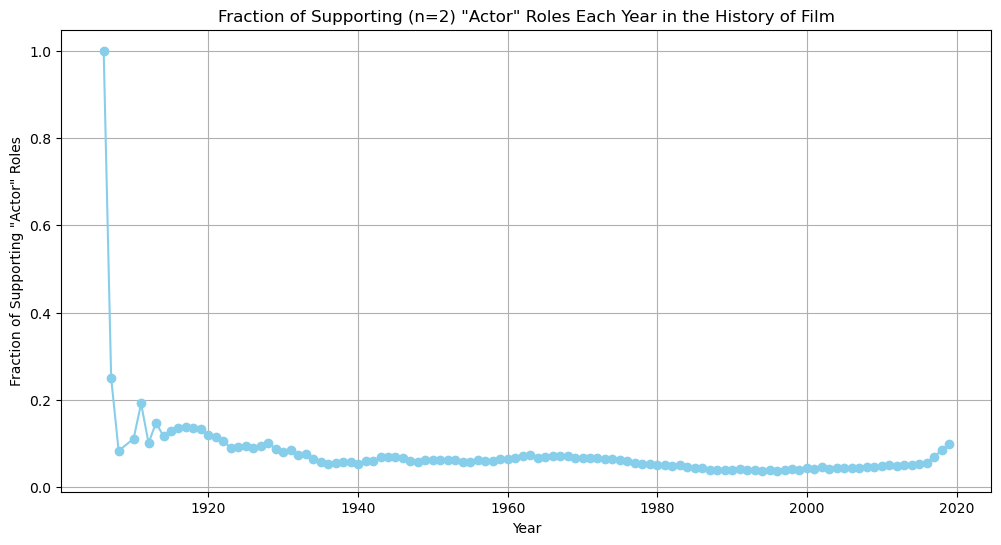

In [12]:
supporting_actor_roles = cast_df[(cast_df['type'] == "actor") & (cast_df['n'] == 2)]

supporting_actor_roles_by_year = supporting_actor_roles.groupby('year').size()

all_supporting_roles = cast_df[(cast_df['type'] == "actor") & (cast_df['n'] >= 2)]

total_supporting_roles_by_year = all_supporting_roles.groupby('year').size()

fraction_supporting_actor_roles = supporting_actor_roles_by_year / total_supporting_roles_by_year

plt.figure(figsize=(12, 6))
fraction_supporting_actor_roles.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Fraction of Supporting (n=2) "Actor" Roles Each Year in the History of Film')
plt.xlabel('Year')
plt.ylabel('Fraction of Supporting "Actor" Roles')
plt.grid(True)
plt.show()

# 8.Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

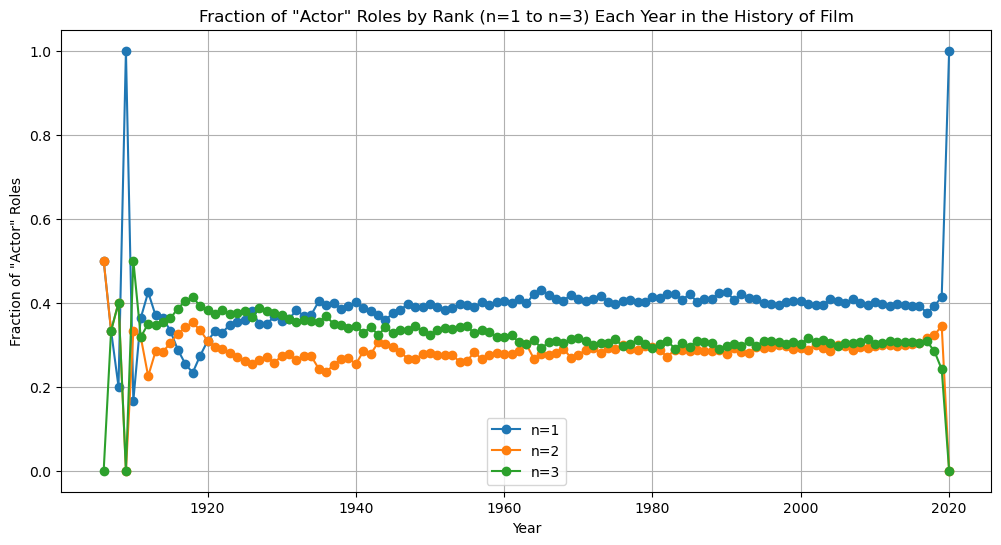

In [13]:
actor_roles_n_1_to_3 = cast_df[(cast_df['type'] == "actor") & (cast_df['n'] >= 1) & (cast_df['n'] <= 3)]

# Group the roles by year, n value, and count the number of actor roles in each group
actor_roles_by_year_n = actor_roles_n_1_to_3.groupby(['year', 'n']).size().unstack(fill_value=0)

# Calculate the fraction of actor roles for each rank (n=1 to n=3) each year
fraction_actor_roles_by_rank = actor_roles_by_year_n.divide(actor_roles_by_year_n.sum(axis=1), axis=0)

# Plot the fractions as lines for each rank (n=1 to n=3)
plt.figure(figsize=(12, 6))
for rank in range(1, 4):
    plt.plot(fraction_actor_roles_by_rank.index, fraction_actor_roles_by_rank[rank], marker='o', label=f'n={rank}')

plt.title('Fraction of "Actor" Roles by Rank (n=1 to n=3) Each Year in the History of Film')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.legend()
plt.grid(True)
plt.show()